In [33]:
#importing the libraries
import numpy as np
import pandas as pds
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings(action='ignore')

sns.set(color_codes=True)
%matplotlib inline

In [34]:
#showing Iris Dataset using pandas Library
#DataFrame named "data"
data = pds.read_csv("D:/Keerthi_oasis_intern/intern_oasis/Iris.csv")
dataframe_name = pds.DataFrame(data)
print(dataframe_name)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [35]:
#showing Iris DataSet using seaborn Library
#DataFrame named "iris_Data"
iris_Data = sns.load_dataset('iris')
print(iris_Data)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [36]:
#check for null values in the dataset
data.isnull().sum()  

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [37]:
#statistical description of dataset--> which finds std,mean,min,four quartile percentile of data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [38]:
#species in iris_data 
print(iris_Data.groupby("species").size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


In [39]:
#lets see the memory usage by iris dataset which has 4 non-null columns and one object-based column 
print(iris_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


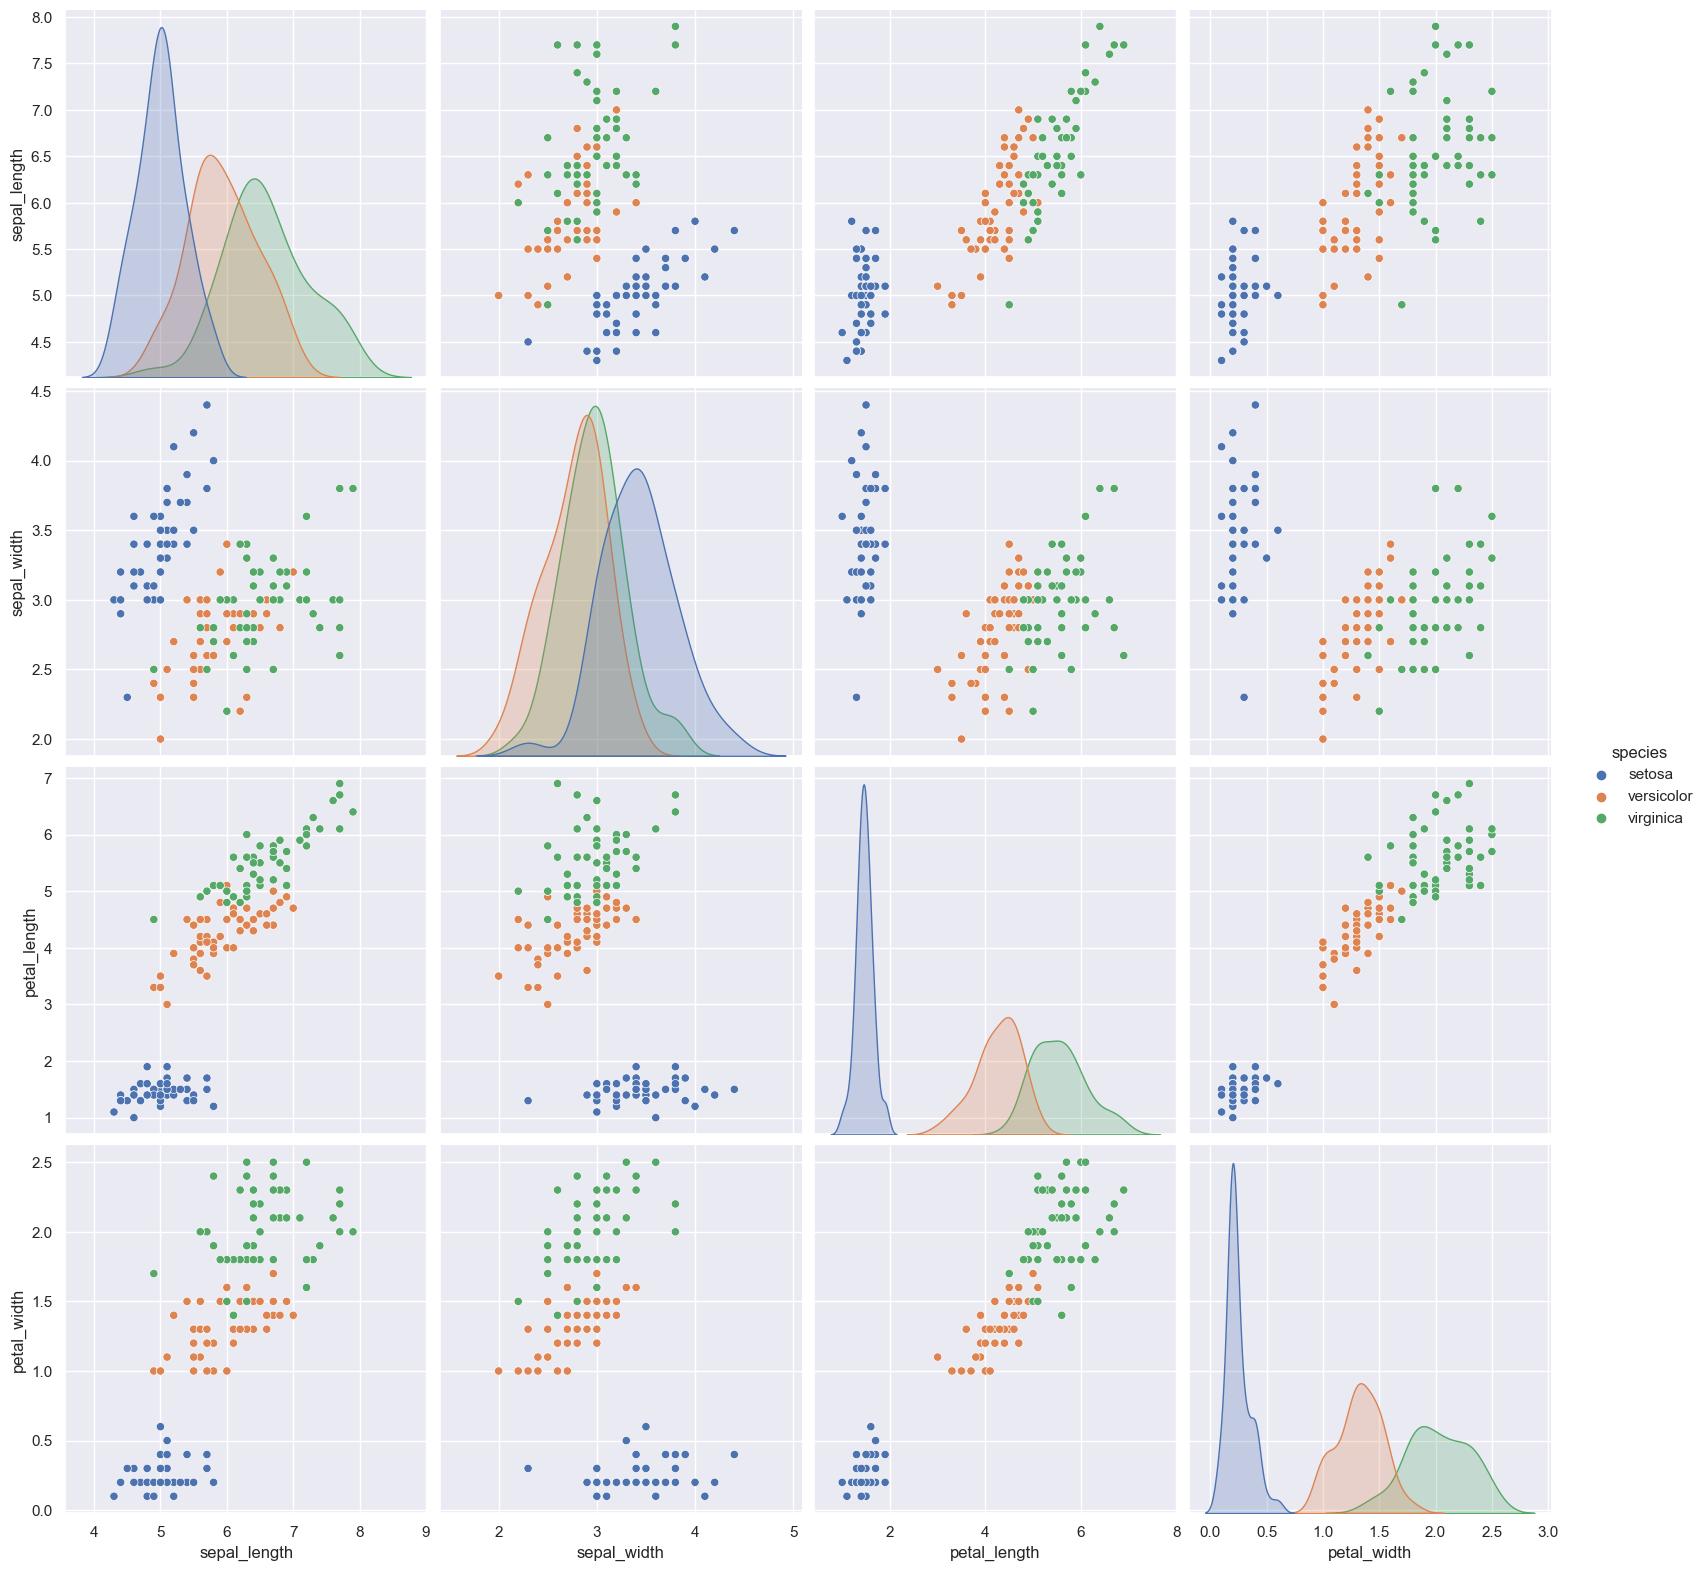

In [40]:
#since we already used seaborn library to analyse the iris data set , lets perform pair-plot using the same dataset
#pair-plot is a corelation with respect to other features
sns.pairplot(iris_Data,hue='species',height=4,aspect=1);
plt.show();

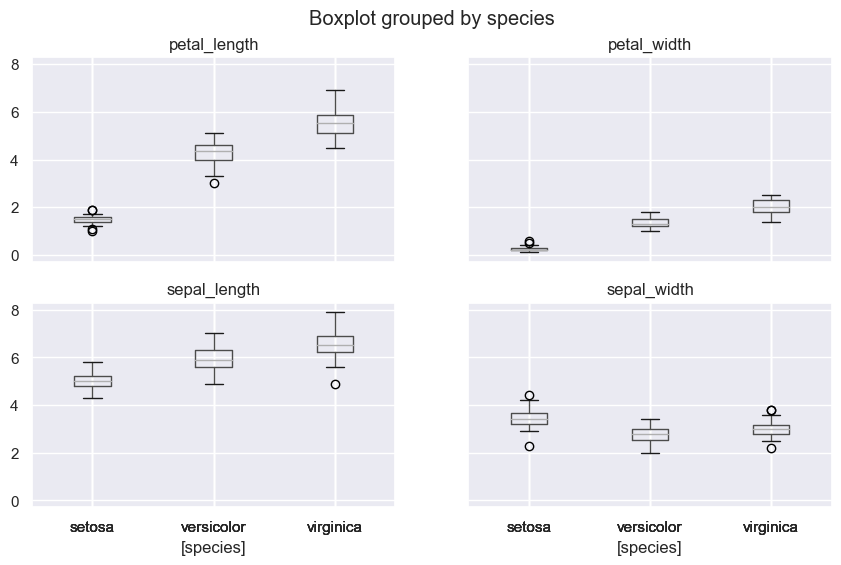

In [41]:
#lets see Box_plot for clear understanding using the same dataset
iris_Data.boxplot(by='species',figsize=(10,6))
plt.show()

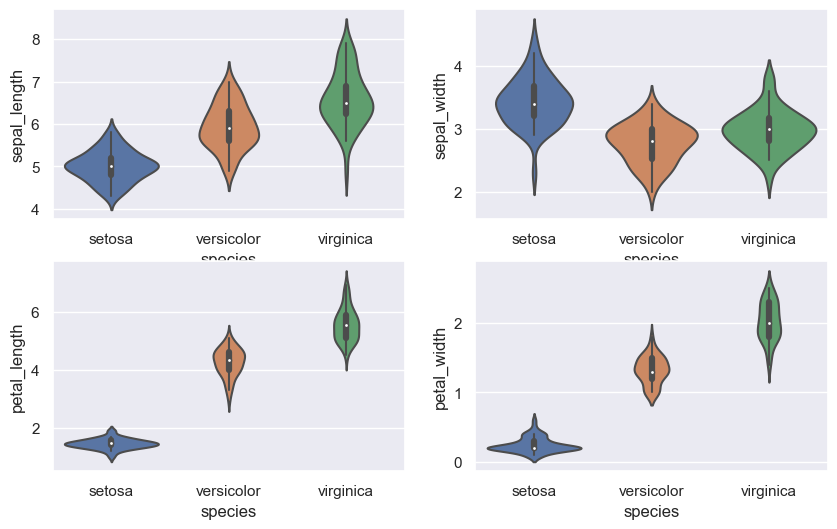

In [42]:
#similar to box-plot let us look at violin-plot that shows visual representation of how our data is scattered over the plane
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=iris_Data)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=iris_Data)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=iris_Data)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=iris_Data)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

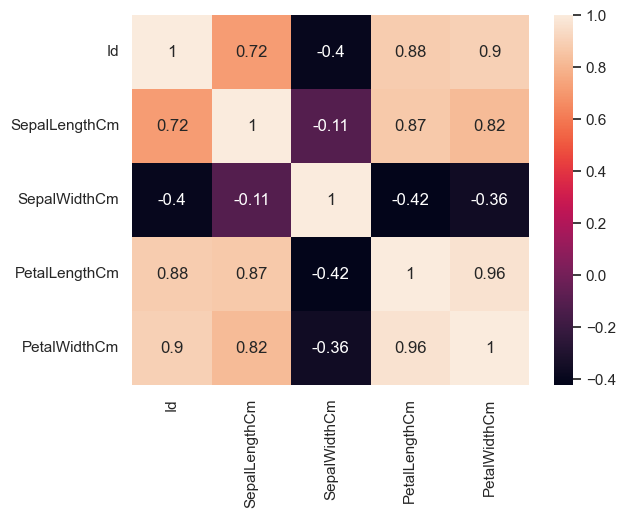

In [43]:
#Heat maps for corelation 
core_matrix = data.corr()
sns.heatmap(core_matrix,annot=True)
plt.show


In [44]:
#print the max values in every species
print(data['SepalLengthCm'].max())
print(data['SepalWidthCm'].max())
print(data['PetalLengthCm'].max())
print(data['PetalWidthCm'].max())

7.9
4.4
6.9
2.5


In [45]:
X = data['SepalLengthCm'].values.reshape(-1,1)
print(X)

[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 [5.7]
 [6.3]
 [5.8]
 [7.1]
 [6.3]
 [6.5]
 [7.6]
 [4.9]
 [7.3]
 [6.7]
 [7.2]
 [6.5]
 [6.4]
 [6.8]
 [5.7]
 [5.8]
 [6.4]
 [6.5]
 [7.7]
 [7.7]
 [6. ]
 [6.9]
 [5.6]
 [7.7]
 [6.3]
 [6.7]
 [7.2]
 [6.2]
 [6.1]
 [6.4]
 [7.2]
 [7.4]
 [7.9]
 [6.4]
 [6.3]
 [6.1]
 [7.7]
 [6.3]
 [6.4]
 [6. ]
 [6.9]
 [6.7]
 [6.9]
 [5.8]

In [46]:
Y = data['SepalWidthCm'].values.reshape(-1,1)
print(Y)

[[3.5]
 [3. ]
 [3.2]
 [3.1]
 [3.6]
 [3.9]
 [3.4]
 [3.4]
 [2.9]
 [3.1]
 [3.7]
 [3.4]
 [3. ]
 [3. ]
 [4. ]
 [4.4]
 [3.9]
 [3.5]
 [3.8]
 [3.8]
 [3.4]
 [3.7]
 [3.6]
 [3.3]
 [3.4]
 [3. ]
 [3.4]
 [3.5]
 [3.4]
 [3.2]
 [3.1]
 [3.4]
 [4.1]
 [4.2]
 [3.1]
 [3.2]
 [3.5]
 [3.1]
 [3. ]
 [3.4]
 [3.5]
 [2.3]
 [3.2]
 [3.5]
 [3.8]
 [3. ]
 [3.8]
 [3.2]
 [3.7]
 [3.3]
 [3.2]
 [3.2]
 [3.1]
 [2.3]
 [2.8]
 [2.8]
 [3.3]
 [2.4]
 [2.9]
 [2.7]
 [2. ]
 [3. ]
 [2.2]
 [2.9]
 [2.9]
 [3.1]
 [3. ]
 [2.7]
 [2.2]
 [2.5]
 [3.2]
 [2.8]
 [2.5]
 [2.8]
 [2.9]
 [3. ]
 [2.8]
 [3. ]
 [2.9]
 [2.6]
 [2.4]
 [2.4]
 [2.7]
 [2.7]
 [3. ]
 [3.4]
 [3.1]
 [2.3]
 [3. ]
 [2.5]
 [2.6]
 [3. ]
 [2.6]
 [2.3]
 [2.7]
 [3. ]
 [2.9]
 [2.9]
 [2.5]
 [2.8]
 [3.3]
 [2.7]
 [3. ]
 [2.9]
 [3. ]
 [3. ]
 [2.5]
 [2.9]
 [2.5]
 [3.6]
 [3.2]
 [2.7]
 [3. ]
 [2.5]
 [2.8]
 [3.2]
 [3. ]
 [3.8]
 [2.6]
 [2.2]
 [3.2]
 [2.8]
 [2.8]
 [2.7]
 [3.3]
 [3.2]
 [2.8]
 [3. ]
 [2.8]
 [3. ]
 [2.8]
 [3.8]
 [2.8]
 [2.8]
 [2.6]
 [3. ]
 [3.4]
 [3.1]
 [3. ]
 [3.1]
 [3.1]
 [3.1]
 [2.7]

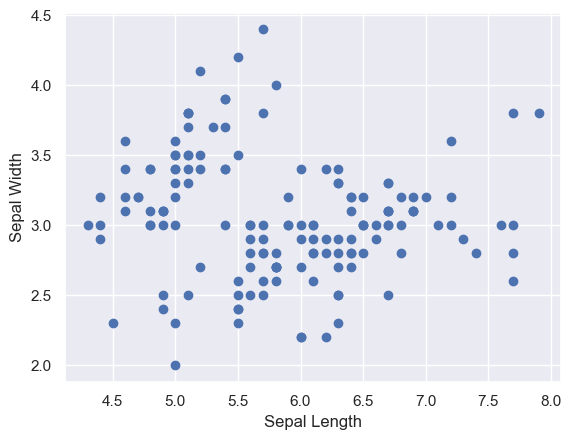

In [47]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(X,Y,color='b')
plt.show()

In [48]:
#Correlation 
corr_mat = data.corr()
print(corr_mat)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


In [49]:
#lets import SVC from sklearn module 
from sklearn.svm import SVC


In [50]:
train, test = train_test_split(data, test_size = 0.25)
train.shape,test.shape

((112, 6), (38, 6))

In [51]:
x_train = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]
y_train = train.Species

x_test= test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_test = test.Species

In [52]:
print(x_train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
67             5.8           2.7            4.1           1.0
51             6.4           3.2            4.5           1.5
10             5.4           3.7            1.5           0.2
11             4.8           3.4            1.6           0.2
115            6.4           3.2            5.3           2.3
..             ...           ...            ...           ...
47             4.6           3.2            1.4           0.2
143            6.8           3.2            5.9           2.3
100            6.3           3.3            6.0           2.5
128            6.4           2.8            5.6           2.1
23             5.1           3.3            1.7           0.5

[112 rows x 4 columns]


In [53]:
print(y_train)

67     Iris-versicolor
51     Iris-versicolor
10         Iris-setosa
11         Iris-setosa
115     Iris-virginica
            ...       
47         Iris-setosa
143     Iris-virginica
100     Iris-virginica
128     Iris-virginica
23         Iris-setosa
Name: Species, Length: 112, dtype: object


In [54]:
print(x_test)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
44             5.1           3.8            1.9           0.4
41             4.5           2.3            1.3           0.3
132            6.4           2.8            5.6           2.2
17             5.1           3.5            1.4           0.3
13             4.3           3.0            1.1           0.1
19             5.1           3.8            1.5           0.3
68             6.2           2.2            4.5           1.5
26             5.0           3.4            1.6           0.4
29             4.7           3.2            1.6           0.2
50             7.0           3.2            4.7           1.4
95             5.7           3.0            4.2           1.2
118            7.7           2.6            6.9           2.3
117            7.7           3.8            6.7           2.2
146            6.3           2.5            5.0           1.9
102            7.1           3.0            5.9           2.1
21      

In [55]:
print(y_test)

44         Iris-setosa
41         Iris-setosa
132     Iris-virginica
17         Iris-setosa
13         Iris-setosa
19         Iris-setosa
68     Iris-versicolor
26         Iris-setosa
29         Iris-setosa
50     Iris-versicolor
95     Iris-versicolor
118     Iris-virginica
117     Iris-virginica
146     Iris-virginica
102     Iris-virginica
21         Iris-setosa
149     Iris-virginica
101     Iris-virginica
56     Iris-versicolor
105     Iris-virginica
135     Iris-virginica
5          Iris-setosa
144     Iris-virginica
72     Iris-versicolor
106     Iris-virginica
137     Iris-virginica
4          Iris-setosa
93     Iris-versicolor
20         Iris-setosa
69     Iris-versicolor
116     Iris-virginica
73     Iris-versicolor
40         Iris-setosa
9          Iris-setosa
32         Iris-setosa
112     Iris-virginica
82     Iris-versicolor
131     Iris-virginica
Name: Species, dtype: object


In [64]:
#Using LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)


In [65]:
#accuracy using logistic regression
from sklearn import metrics
k = metrics.accuracy_score(prediction,y_test)
print('Accuracy Score:',k)

Accuracy Score: 0.9736842105263158


In [66]:

#using SVC(supporting vector classification) model1 
model1 = SVC()
model1.fit(x_train,y_train)

pred_y = model1.predict(x_test)
print(pred_y)

['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica']


In [67]:
#Using Support vector machine accuracy 
k1 = accuracy_score(y_test,pred_y)
print("Acc=",k1)

Acc= 0.9736842105263158


In [68]:
#lets see the accuracy using guassianNB naive bayes
#import GaussianNB
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(x_train,y_train)
pred_y1 = model2.predict(x_test)

print(pred_y1)

['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica']


In [69]:
#accuracy using naive bayes
k2 = accuracy_score(y_test,pred_y1)
print("Accuracy Score:",k2)

Accuracy Score: 0.9736842105263158


In [70]:
results = pds.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes'],
    'Score': [k,k1,k2]})

result_data = results.sort_values(by='Score', ascending=False)
result_data = result_data.set_index('Score')
result_data

,Model
Score,
0.973684,Logistic Regression
0.973684,Support Vector Machines
0.973684,Naive Bayes


In [71]:
user_input = [[5.1,3.5,1.4,0.2]]
predicted_species = model.predict(user_input)
predicted_species1 = model1.predict(user_input)
predicted_species2 = model2.predict(user_input)
print("Predicted species for the given input using logistic regression: ", predicted_species)
print("Predicted species for the given input using SVM: ", predicted_species1)
print("Predicted species for the given input using GuassianNB: ", predicted_species2)

Predicted species for the given input using logistic regression:  ['Iris-setosa']
Predicted species for the given input using SVM:  ['Iris-setosa']
Predicted species for the given input using GuassianNB:  ['Iris-setosa']
